In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


In [4]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X = iris_dataset['data']
y = iris_dataset['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


In [5]:
import numpy as np

print(iris_dataset)

print("--------------------------------")
print("Keys of the dataset:", iris_dataset.keys())

print("--------------------------------")
print("Feature names:", iris_dataset.feature_names)

print("--------------------------------")
print("Target names:", iris_dataset.target_names)

print("--------------------------------")
print("Shape of data:", iris_dataset.data.shape)

print("--------------------------------")
print("Shape of target:", iris_dataset.target.shape)

print("--------------------------------")
print("Number of missing values:", np.isnan(iris_dataset.data).sum())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# PCA Implementation using Covariance Method

In [15]:
class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):

        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale


        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)


        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T

        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.n_components,:]


        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj

In [16]:
my_pca = MyPCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio from scratch:
 [0.7296244541329989, 0.22850761786701754]
Cumulative explained variance from scratch:
 [0.72962445 0.95813207]
Transformed data shape from scratch: (150, 2)


# PCA Implementation Using Scikit Learn

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


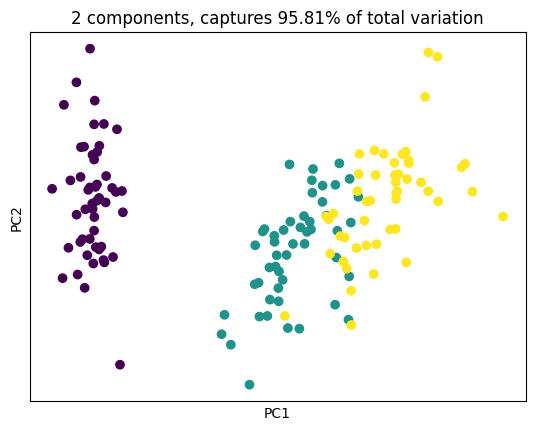

In [17]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()